# Linear / Ridge / Lasso Regression — (Chỉ dùng tập Train)

## Bước 1 - Import các thư viện cần thiết
Khai báo thư mục dữ liệu/đầu ra.

Import các thư viện cần thiết.

In [1]:
# Thư viện cơ bản
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Thư mục lưu hình
os.makedirs("../model/1_linear_regression/results", exist_ok=True)
os.makedirs("../model/1_linear_regression/saved_models", exist_ok=True)
RANDOM_STATE = 42

## Bước 2 - Đọc dữ liệu đã tiền xử lý
Đọc dữ liệu từ các file CSV đã được tiền xử lý và chia sẵn thành train/validation/test.

In [2]:
# Đọc dữ liệu
train_df = pd.read_csv('../data/processed/train.csv')
val_df = pd.read_csv('../data/processed/val.csv')
test_df = pd.read_csv('../data/processed/test.csv')

print("="*60)
print("THÔNG TIN DỮ LIỆU")
print("="*60)
print(f"Kích thước tập Train:      {train_df.shape}")
print(f"Kích thước tập Validation: {val_df.shape}")
print(f"Kích thước tập Test:       {test_df.shape}")
print("="*60)

# Hiển thị 5 dòng đầu của tập train
print("\n5 dòng đầu tiên của tập Train:")
train_df.head()

THÔNG TIN DỮ LIỆU
Kích thước tập Train:      (3255, 15)
Kích thước tập Validation: (1085, 15)
Kích thước tập Test:       (1085, 15)

5 dòng đầu tiên của tập Train:


,country_name,country_code,year,population,poverty_ratio,pop_growth,life_expectancy,gdp_per_capita,gdp_growth,sanitation,electricity,water_access,co2_emissions,slum_population,labor_force
0,Romania,ROU,2019,-0.103917,-0.597527,-1.127234,75.607317,-0.111538,0.095559,1.054465,0.619765,0.741985,-0.050517,-0.947687,-0.870988
1,Mauritius,MUS,2006,-0.242815,-0.693447,-0.510294,72.432195,-0.408990,0.257531,-0.109553,0.584429,0.713613,-0.227893,1.478783,-0.184739
2,Angola,AGO,2008,-0.087016,0.313714,1.546892,55.281000,-0.473931,1.341229,-0.870639,-1.553444,-2.267172,-0.441713,0.151208,1.614850
3,Albania,ALB,2001,-0.228830,-0.583978,-1.382935,75.083000,-0.587132,0.944795,-0.895734,0.598563,-0.027252,-0.413544,0.454933,-0.099440
4,Central African Republic,CAF,2021,-0.213116,2.687734,0.247317,40.279000,-0.621139,-0.409868,-1.390005,-2.359122,-3.005694,-0.539501,1.528277,1.186080


## Bước 3 - Chuẩn bị dữ liệu cho mô hình

Tách biến mục tiêu (life_expectancy) khỏi các đặc trưng.

Loại bỏ các cột không cần thiết như country_name, country_code, và year

In [3]:
# Định nghĩa các cột đặc trưng (loại bỏ cột không cần thiết)
feature_cols = [col for col in train_df.columns 
                if col not in ['life_expectancy', 'country_name', 'country_code', 'year']]

# Tách X và y cho từng tập
X_train = train_df[feature_cols]
y_train = train_df['life_expectancy']

X_val = val_df[feature_cols]
y_val = val_df['life_expectancy']

X_test = test_df[feature_cols]
y_test = test_df['life_expectancy']

print("="*60)
print("THÔNG TIN CÁC TẬP DỮ LIỆU")
print("="*60)
print(f"Số lượng đặc trưng: {len(feature_cols)}")
print(f"\nCác đặc trưng được sử dụng:")
for i, col in enumerate(feature_cols, 1):
    print(f"  {i}. {col}")

print(f"\nKích thước X_train: {X_train.shape}")
print(f"Kích thước y_train: {y_train.shape}")
print(f"Kích thước X_val:   {X_val.shape}")
print(f"Kích thước y_val:   {y_val.shape}")
print(f"Kích thước X_test:  {X_test.shape}")
print(f"Kích thước y_test:  {y_test.shape}")
print("="*60)

THÔNG TIN CÁC TẬP DỮ LIỆU
Số lượng đặc trưng: 11

Các đặc trưng được sử dụng:
  1. population
  2. poverty_ratio
  3. pop_growth
  4. gdp_per_capita
  5. gdp_growth
  6. sanitation
  7. electricity
  8. water_access
  9. co2_emissions
  10. slum_population
  11. labor_force

Kích thước X_train: (3255, 11)
Kích thước y_train: (3255,)
Kích thước X_val:   (1085, 11)
Kích thước y_val:   (1085,)
Kích thước X_test:  (1085, 11)
Kích thước y_test:  (1085,)


## Bước 4 - Xây dựng mô hình Linear Regression (train)
Fit mô hình LinearRegression() trên tập Train làm baseline.

In MSE và R² trên tập Train để tham chiếu.

In [4]:
lin = LinearRegression()
lin.fit(X_train, y_train)
y_train_pred_lin = lin.predict(X_train)
lin_train_mse = mean_squared_error(y_train, y_train_pred_lin)
lin_train_r2  = r2_score(y_train, y_train_pred_lin)
print(f"LinearRegression | Train MSE: {lin_train_mse:.4f} | R2: {lin_train_r2:.4f}")

joblib.dump(lin, "../model/1_linear_regression/saved_models/linear_regression.pkl")

LinearRegression | Train MSE: 17.4675 | R2: 0.7677


['../model/1_linear_regression/saved_models/linear_regression.pkl']

## Bước 5 - Tối ưu hóa siêu tham số Ridge bằng GridSearchCV (k=5)
Tìm giá trị alpha tốt nhất cho RidgeRegression bằng 5-fold cross-validation (train).

So sánh MSE giữa các giá trị alpha [0.01, 0.05, 0.25, 0.5].

In [5]:
ridge_param_grid = {'alpha': [0.01, 0.05, 0.25, 0.5]}
ridge = Ridge(random_state=RANDOM_STATE)
ridge_cv = GridSearchCV(ridge, ridge_param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
ridge_cv.fit(X_train, y_train)
best_ridge_alpha = ridge_cv.best_params_['alpha']
print("Ridge best alpha (5-fold CV, train-only):", best_ridge_alpha)

ridge_best = Ridge(alpha=best_ridge_alpha, random_state=RANDOM_STATE)
ridge_best.fit(X_train, y_train)
y_train_pred_ridge = ridge_best.predict(X_train)
ridge_train_mse = mean_squared_error(y_train, y_train_pred_ridge)
ridge_train_r2  = r2_score(y_train, y_train_pred_ridge)
print(f"Ridge | Train MSE: {ridge_train_mse:.4f} | R2: {ridge_train_r2:.4f}")

joblib.dump(ridge_best, f"../model/1_linear_regression/saved_models/ridge_best_alpha_{best_ridge_alpha}.pkl")

Ridge best alpha (5-fold CV, train-only): 0.5
Ridge | Train MSE: 17.4675 | R2: 0.7677


['../model/1_linear_regression/saved_models/ridge_best_alpha_0.5.pkl']

## Bước 6 - Tối ưu hóa siêu tham số Lasso bằng GridSearchCV (k=5)
Tìm alpha tối ưu cho LassoRegression bằng 5-fold cross-validation.

In [6]:
lasso_param_grid = {'alpha': [0.01, 0.05, 0.25, 0.5]}
lasso = Lasso(random_state=RANDOM_STATE, max_iter=5000)
lasso_cv = GridSearchCV(lasso, lasso_param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
lasso_cv.fit(X_train, y_train)
best_lasso_alpha = lasso_cv.best_params_['alpha']
print("Lasso best alpha (5-fold CV, train-only):", best_lasso_alpha)

lasso_best = Lasso(alpha=best_lasso_alpha, random_state=RANDOM_STATE, max_iter=5000)
lasso_best.fit(X_train, y_train)
y_train_pred_lasso = lasso_best.predict(X_train)
lasso_train_mse = mean_squared_error(y_train, y_train_pred_lasso)
lasso_train_r2  = r2_score(y_train, y_train_pred_lasso)
print(f"Lasso | Train MSE: {lasso_train_mse:.4f} | R2: {lasso_train_r2:.4f}")

joblib.dump(lasso_best, f"../model/1_linear_regression/saved_models/lasso_best_alpha_{best_lasso_alpha}.pkl")

Lasso best alpha (5-fold CV, train-only): 0.01
Lasso | Train MSE: 17.4686 | R2: 0.7677


['../model/1_linear_regression/saved_models/lasso_best_alpha_0.01.pkl']

## Bước 7 - Vẽ training loss theo epoch (10) — Linear (SGDRegressor)
Trực quan hoá quá trình hội tụ của mô hình Linear (SGD) qua 10 epoch.

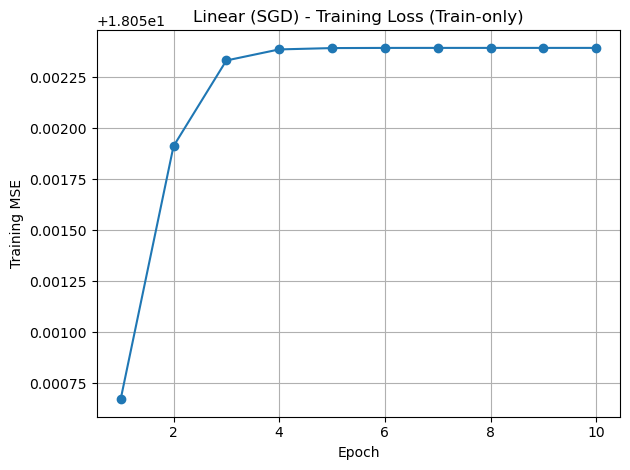

In [7]:
def plot_training_loss_sgd(X, y, penalty, alpha, title, out_path, epochs=10, eta0=0.01):
    # penalty: None | 'l2' | 'l1' | 'elasticnet'
    # For no regularization use penalty=None and set alpha=0.0
    sgd = SGDRegressor(penalty=penalty, alpha=alpha, learning_rate='constant',
                       eta0=eta0, max_iter=1, tol=None, random_state=RANDOM_STATE, warm_start=True)
    losses = []
    for epoch in range(epochs):
        sgd.fit(X, y)  # 1 epoch
        y_hat = sgd.predict(X)
        losses.append(mean_squared_error(y, y_hat))
    plt.figure()
    plt.plot(range(1, epochs+1), losses, marker='o')
    plt.xlabel('Epoch'); plt.ylabel('Training MSE'); plt.title(title)
    plt.grid(True); plt.tight_layout()
    plt.savefig(out_path, dpi=150); plt.show()
    return losses

# Linear: use penalty=None and alpha=0.0 (no regularization)
lin_losses = plot_training_loss_sgd(
    X_train, y_train,
    penalty=None, alpha=0.0,
    title='Linear (SGD) - Training Loss (Train-only)',
    out_path='../model/1_linear_regression/results/linear_training_loss.png',
    epochs=10, eta0=0.01
)

## Bước 8 - Vẽ training loss theo epoch (10) — Ridge (SGDRegressor)
Theo dõi Training RMSE/MAE/R² theo epoch cho Ridge (SGD).

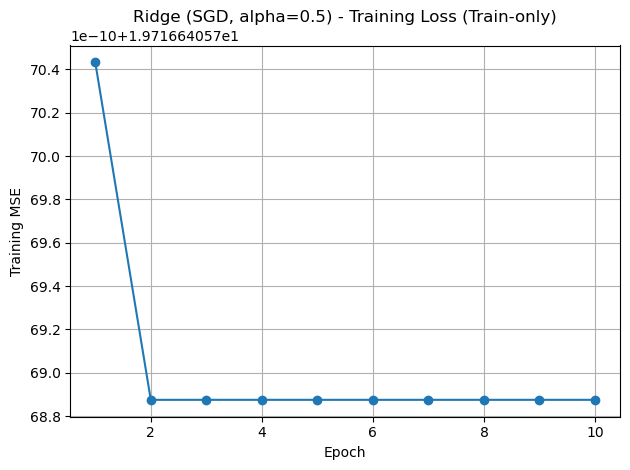

In [8]:
ridge_losses = plot_training_loss_sgd(
    X_train, y_train,
    penalty='l2', alpha=best_ridge_alpha,
    title=f'Ridge (SGD, alpha={best_ridge_alpha}) - Training Loss (Train-only)',
    out_path=f'../model/1_linear_regression/results/ridge_training_loss_alpha_{best_ridge_alpha}.png',
    epochs=10, eta0=0.01
)

## Bước 9 - Vẽ training loss theo epoch (10) — Lasso (SGDRegressor)
Theo dõi Training RMSE/MAE/R² theo epoch cho Lasso (SGD).

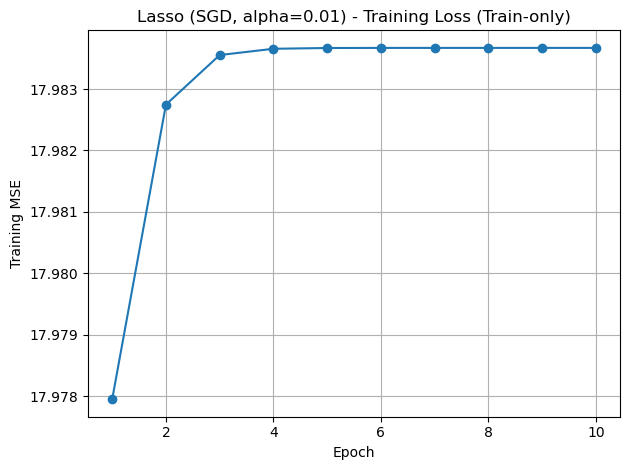

In [9]:
lasso_losses = plot_training_loss_sgd(
    X_train, y_train,
    penalty='l1', alpha=best_lasso_alpha,
    title=f'Lasso (SGD, alpha={best_lasso_alpha}) - Training Loss (Train-only)',
    out_path=f'../model/1_linear_regression/results/lasso_training_loss_alpha_{best_lasso_alpha}.png',
    epochs=10, eta0=0.01
)

## Kết luận
Tổng kết quá trình huấn luyện 3 mô hình (Linear, Ridge, Lasso).

In [10]:
print("Hoàn tất: đã huấn luyện Linear/Ridge/Lasso bằng hàm có sẵn (train-only),")
print("dùng 5-fold CV để chọn alpha cho Ridge & Lasso,")
print("và đã vẽ training loss theo 10 epoch (SGDRegressor) vào thư mục ../model/1_linear_regression/results.")

Hoàn tất: đã huấn luyện Linear/Ridge/Lasso bằng hàm có sẵn (train-only),
dùng 5-fold CV để chọn alpha cho Ridge & Lasso,
và đã vẽ training loss theo 10 epoch (SGDRegressor) vào thư mục ../model/1_linear_regression/results.
